In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dfply import *
from plotnine import *

import altair
import seaborn as sns

import missingno as msn

# Import the plotly required packages
import plotly.express as px # Express Plotting Library, cuz it's easier to get started
import plotly.graph_objects as go # Base/Core Plotting Library
import plotly.figure_factory as ff # Import figure factory
import plotly

''' For PCA'''
# PCA
from sklearn.decomposition import PCA
# Incremental PCA
from sklearn.decomposition import IncrementalPCA
# Sparse PCA
from sklearn.decomposition import SparsePCA
# Kernel PCA
from sklearn.decomposition import KernelPCA

'''Algos'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.manifold import TSNE
import umap

''' One Hot Encoding'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler

import sklearn.metrics as m
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, recall_score, accuracy_score, roc_curve, auc


In [3]:
# params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# data_dmatrix = xgb.DMatrix(data=X_train, label= yLabel)

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed= 420)
# cv_results.head()

NameError: name 'cv_results' is not defined

In [6]:
audio = pd.read_csv("Data/audiology.data", sep = "\t")
audio.head()

,"[p1,cochlear_unknown,[boneAbnormal,air(mild),ar_c(normal),ar_u(normal),o_ar_c(normal),o_ar_u(normal),speech(normal),static(normal),tymp(a)]]"
0,"[p2,cochlear_unknown,[boneAbnormal,air(moderat..."
1,"[p3,mixed_cochlear_age_fixation,[age_gt_60,air..."
2,"[p4,mixed_cochlear_age_otitis_media,[age_gt_60..."
3,"[p5,cochlear_age,[age_gt_60,boneAbnormal,air(m..."
4,"[p6,cochlear_age,[age_gt_60,boneAbnormal,air(m..."


In [7]:
link = "https://archive.ics.uci.edu/ml/datasets/Census+Income"
adult = pd.read_csv("Data/adult.data")
adult

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Genre Music

[Kaggle gtzan dataset music genre](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?select=Data)

In [8]:
filePath3_sec = "Data/Data_Genre/features_3_sec.csv"
filePath30_sec = "Data/Data_Genre/features_30_sec.csv"
genre3 = pd.read_csv(filePath3_sec)
genre30 = pd.read_csv(filePath30_sec)
genre3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [9]:
genre30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [10]:
print(f"genre3's shape: {genre3.shape}")
print(f"genre30's shape {genre30.shape}")

genre3's shape: (9990, 60)
genre30's shape (1000, 60)


In [11]:
print(genre3["filename"][0:50])

0     blues.00000.0.wav
1     blues.00000.1.wav
2     blues.00000.2.wav
3     blues.00000.3.wav
4     blues.00000.4.wav
5     blues.00000.5.wav
6     blues.00000.6.wav
7     blues.00000.7.wav
8     blues.00000.8.wav
9     blues.00000.9.wav
10    blues.00001.0.wav
11    blues.00001.1.wav
12    blues.00001.2.wav
13    blues.00001.3.wav
14    blues.00001.4.wav
15    blues.00001.5.wav
16    blues.00001.6.wav
17    blues.00001.7.wav
18    blues.00001.8.wav
19    blues.00001.9.wav
20    blues.00002.0.wav
21    blues.00002.1.wav
22    blues.00002.2.wav
23    blues.00002.3.wav
24    blues.00002.4.wav
25    blues.00002.5.wav
26    blues.00002.6.wav
27    blues.00002.7.wav
28    blues.00002.8.wav
29    blues.00002.9.wav
30    blues.00003.0.wav
31    blues.00003.1.wav
32    blues.00003.2.wav
33    blues.00003.3.wav
34    blues.00003.4.wav
35    blues.00003.5.wav
36    blues.00003.6.wav
37    blues.00003.7.wav
38    blues.00003.8.wav
39    blues.00003.9.wav
40    blues.00004.0.wav
41    blues.0000

### Arrhythmia Data

From [here](https://archive.ics.uci.edu/ml/datasets/Arrhythmia)

In [2]:
filePath = "Data/arrhythmia.data"
arrhythmia = pd.read_csv(filePath)
columns = [f"col_{i}" for i in range(arrhythmia.shape[1])]
columns[0:4] = ["age", "sex", "height", "weight"]



# this is the last
columns[-1] = "arrhythmiaType"
arrhythmia.columns = columns
print(f"Shape: {arrhythmia.shape}")
arrhythmia.head()

Shape: (451, 280)


,age,sex,height,weight,col_4,col_5,col_6,col_7,col_8,col_9,...,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,arrhythmiaType
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


<AxesSubplot:>

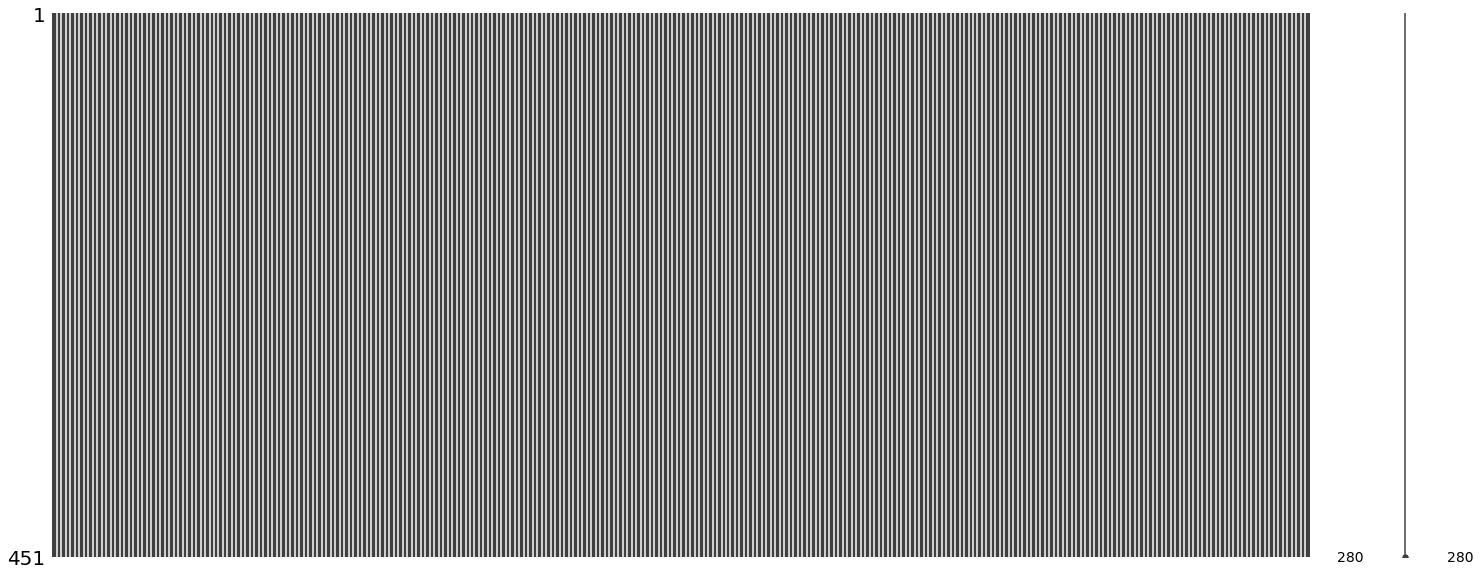

In [3]:
msn.matrix(arrhythmia)

There appears to be no NAs at all in this dataset. Awesome!

In [4]:
arrhythmia.describe()

,age,sex,height,weight,col_4,col_5,col_6,col_7,col_8,col_9,...,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,arrhythmiaType
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


### Quick Peak At Distribution Of Arrhythmia Type (Y-Variable)

<AxesSubplot:>

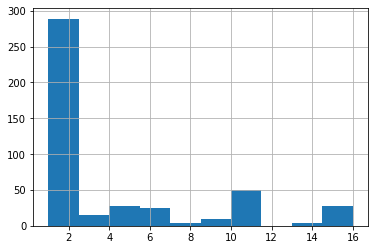

In [5]:
arrhythmia["arrhythmiaType"].hist()

Already, we can see a massive class imbalance. Class 01 is considered "normal heart". There are way more patients who have normal heart conditions than arrhythmias (irregular heart rhythm).

### Eradicating The ? (And The NAs)

There were some columns with the values "?". We replaced those "?" values as NA, then replaced each NA with the column mean.

The columns index 10--14 (inclusive) are of type object, the only columns who are non-numeric.

In [6]:
arrhythmia.columns[arrhythmia.dtypes == "object"]

(
    arrhythmia >>
    select(X.col_10, X.col_11, X.col_12, X.col_13, X.col_14) >>
    mask((X.col_10 == "?") | (X.col_11 == "?") | (X.col_12 == "?") 
         | (X.col_13 == "?") | (X.col_14 == "?"))
    
)

,col_10,col_11,col_12,col_13,col_14
0,37,-17,31,?,53
2,11,-5,20,?,71
3,13,61,3,?,?
4,66,52,88,?,84
5,49,75,65,?,70
...,...,...,...,...,...
444,68,31,80,?,70
445,42,72,42,?,75
446,4,40,-27,?,63
447,66,52,79,?,73


In [7]:
objectCols = ["col_10", "col_11", "col_12", "col_13", "col_14"]

# finding the row and columns who had value = ?
questionRows, questionCols = np.where(arrhythmia[objectCols] == "?")

In [8]:
arrhythmia2 = arrhythmia.copy()
# arrhythmia2["col_14"] = pd.to_numeric(arrhythmia['col_14'], errors='coerce').astype('Int64')
# df['Col2'] = df['Col2'].fillna(df['col_14'].mean())
arrhythmia2[objectCols] = arrhythmia2[objectCols].replace("?", np.nan)

# for some reason, inplace = True did not work.
# arrhythmia2[objectCols].fillna(arrhythmia2[objectCols].astype("float").mean(), inplace = True)

In [9]:
arrhythmia2[objectCols] = arrhythmia2[objectCols].fillna(arrhythmia2[objectCols].astype("float").mean())

We have successfully replaced every "?" value with a column mean. 

In [10]:
def toLabelBinarize(mydf, categoryCols):
    '''
    Spawns dummy variables for columns without inherent ordering
    
    @param mydf the dataframe
    @param categoryCols the list of columns to categorize. These columns could be type object, nominal, etc
    @return the dataframe (after the columns have been labelized binarized)
    '''
    
    for col in categoryCols:
        # Forcing the column to be string, not some weird mixed type
        mydf[col] = mydf[col].apply(lambda x: str(x))

            # Spawn a label binarizer that does one hot encoding
        enc = LabelBinarizer()

            # Conerts a numpy array into a list
            # list contains all the different..categories per column
            # Transformed
            # Mon, Tues, Wed
            # isMon, isTues, isWed
        transformed = enc.fit_transform(mydf[col]) # a numpy array
    #         print(enc.classes_.tolist())
    #         print(transformed.shape)
        op_df = pd.DataFrame(transformed, columns = enc.classes_.tolist())

            # Drops the first column/reference column
        op_df.drop(columns = [op_df.columns[0]], inplace = True)

            # Drop that original colomn
        mydf = mydf.drop(columns=[col])       

            # Concatenate the rest of the columns
        mydf = pd.concat([mydf, op_df], axis=1)
    return mydf

In [11]:
# We got the nominal columns from the data dictionary
nominalCols = ["col_21", "col_22", "col_23", "col_24", "col_25", "col_26"]

# labeling and binarizing the nominal columns; placing into a new df
# arrhythmia3 = toLabelBinarize(arrhythmia2, nominalCols)


array([[<AxesSubplot:title={'center':'col_21'}>,
        <AxesSubplot:title={'center':'col_22'}>],
       [<AxesSubplot:title={'center':'col_23'}>,
        <AxesSubplot:title={'center':'col_24'}>],
       [<AxesSubplot:title={'center':'col_25'}>,
        <AxesSubplot:title={'center':'col_26'}>]], dtype=object)

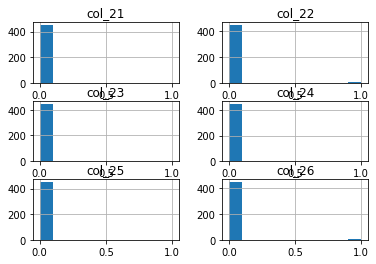

In [12]:
arrhythmia2[nominalCols].hist()

Never mind. Upon closer inspection, these columns are actually simply binary columns. They are already binary!

### Standardize

We need to standardize. I don't want my weight column to be considered the most important column simply because its values are huge and very varied.

In [13]:
standardScaler = StandardScaler()

yLabel = arrhythmia2["arrhythmiaType"]

arrhythmiaStandardized = standardScaler.fit_transform(arrhythmia2) # a standardized array
arrhythmiaStandardized = pd.DataFrame(arrhythmiaStandardized, columns = arrhythmia2.columns)

arrhythmiaStandardized["arrhythmiaType"] = yLabel
arrhythmiaStandardized.head()

,age,sex,height,weight,col_4,col_5,col_6,col_7,col_8,col_9,...,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,arrhythmiaType
0,0.584465,0.900691,-0.030556,-0.249926,-0.515211,0.422509,1.012446,-0.587668,-1.975379,-0.193673,...,0.509553,-0.157828,0.728446,-0.079635,0.0,-0.904664,0.619005,0.080185,0.507359,6
1,0.462600,-1.110258,0.157852,1.619636,3.194741,0.177010,0.563141,0.422643,0.467876,1.371202,...,0.509553,0.130119,-0.470201,-0.079635,0.0,-0.616526,1.532018,-0.519699,1.059604,10
2,0.523533,-1.110258,0.238599,1.559327,0.721440,1.047414,0.383420,0.254258,2.057930,-0.127551,...,0.509553,0.907576,-0.370314,-0.079635,0.0,-0.328388,0.970164,1.131832,1.741790,1
3,1.742181,-1.110258,0.642330,0.715009,-0.059603,0.578735,-0.215653,0.198130,0.506657,-1.097333,...,0.509553,1.166728,-1.069525,-0.079635,0.0,-1.769077,1.883177,0.450483,1.806760,7
4,-2.035630,-1.110258,0.077106,-1.033935,0.721440,0.266283,-1.383844,0.113937,0.041276,1.613647,...,-0.583905,0.907576,-0.669976,-0.079635,0.0,1.112302,0.689237,-0.430827,0.090468,14


### PCA

In [14]:
# Splitting into train and test
arrhythmiaStandardX = arrhythmiaStandardized.drop(columns = ["arrhythmiaType"])
train, test = train_test_split(arrhythmiaStandardized,  test_size=0.2, random_state = 420, shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(arrhythmiaStandardX, yLabel, test_size = 0.33, random_state = 420)

In [15]:
# n_components = train.shape[1]
n_components = 5
whiten = False # wtf is this?
# Why do we need this train index?
train_index = range(0,len(X_train))
random_state = 420

# spawning the PCA model
pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

# fitting and transforming the df
train_pca = pca.fit_transform(X_train)
train_pca = pd.DataFrame(data = train_pca, index = train_index)

# fitting df
mod = pca.fit(X_train)
print(mod.components_.shape)
pd.DataFrame(mod.components_).head(3)

(5, 279)


,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.071842,-0.009913,-0.011827,0.036440,0.043221,-0.006954,0.037046,0.059062,0.004147,-0.147997,...,-0.055410,0.060114,-0.065846,-0.061864,0.015223,0.0,-0.000602,-0.097657,-0.039718,-0.102163
1,0.052210,0.021355,-0.063418,0.059913,0.001382,-0.003800,0.072883,0.025798,-0.007695,0.023897,...,-0.144001,-0.000041,0.081518,0.151429,-0.002267,-0.0,-0.004910,-0.050255,0.177145,0.085814
2,0.021081,-0.010687,-0.006095,0.009711,-0.059696,-0.002775,-0.004993,0.021189,-0.021883,0.042071,...,0.036566,-0.033203,-0.066990,0.057909,-0.013604,0.0,0.002442,-0.024793,-0.027563,-0.038655


Those are the components scores of each of the 280 columns.

In [16]:
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3", "PC4", "PC5"]).T

,PC1,PC2,PC3,PC4,PC5
0,9.0,8.0,6.0,5.0,4.0


These PCA explained very little variance. I am ashamed by how little variance the first few components explained. The first component usually explains the most variance; yet, this first PC explains only 8% variance of data.

In [17]:
# get loadings
pd.DataFrame(train_pca,
            index= arrhythmiaStandardized.columns).style.background_gradient(cmap='seismic')

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered


,0,1,2,3,4
age,nan,nan,nan,nan,nan
sex,nan,nan,nan,nan,nan
height,nan,nan,nan,nan,nan
weight,nan,nan,nan,nan,nan
col_4,nan,nan,nan,nan,nan
col_5,nan,nan,nan,nan,nan
col_6,nan,nan,nan,nan,nan
col_7,nan,nan,nan,nan,nan
col_8,nan,nan,nan,nan,nan
col_9,nan,nan,nan,nan,nan


In [18]:
# train_pca.columns = 
train_pca.columns = [f"PC{i}" for i in range(1, train_pca.shape[1] + 1)]
print(train_pca.shape)
train_pca.head()

(302, 5)


,PC1,PC2,PC3,PC4,PC5
0,3.348934,1.319414,-1.367405,-0.811159,0.200878
1,-10.324899,-18.491384,-16.910934,3.316518,-3.417428
2,-3.703808,2.136229,0.472303,-3.275091,-0.575790
3,-0.407907,0.070368,2.104666,-2.351879,-2.896516
4,-7.355392,-0.438355,0.584635,-1.922574,6.005108


<AxesSubplot:>

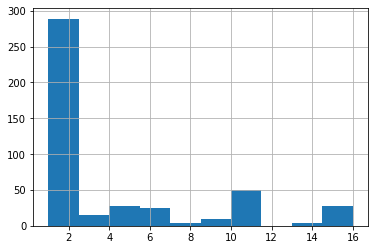

In [19]:
yLabel.hist()

In [20]:
def graphPCAComponents(pc1, pc2, colorVar = None):
    plt.figure()
    
    plt.scatter(pc1, pc2, c = colorVar)
    if colorVar is not None:
        plt.colorbar()
    plt.xlabel("Principal Component #1")
    plt.ylabel("Principal Component #2")
    plt.title("2-Component PCA")
    plt.show()

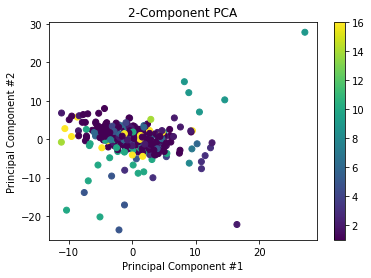

In [21]:
colorVar = y_train
graphPCAComponents(train_pca["PC1"], train_pca["PC2"], colorVar = colorVar)

PCA did a poor job in separating the clusters, separating the different types of arrhythmias.

In [22]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = [i for i in range(1, 17)]
# colors = ["red", "lightcoral", "orange", "yellow"]
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['target'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

# colorVar = sorted(yLabel.unique())

In [23]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["perc_var"])
pc_df = pc_df.reset_index()
pc_df = pc_df.rename(columns={"index":"components"})
pc_df.head()

,components,perc_var
0,1,0.087598
1,2,0.075980
2,3,0.061380
3,4,0.049013
4,5,0.040559


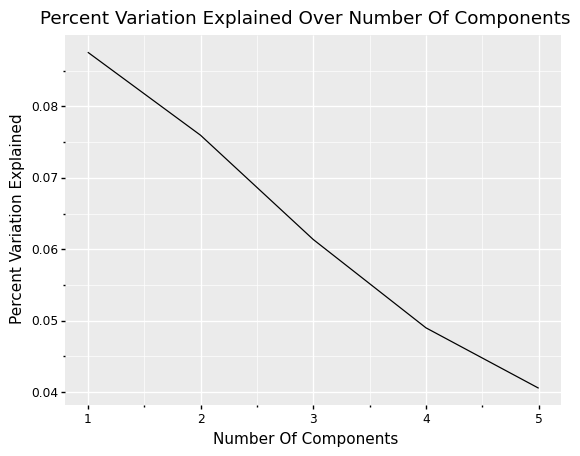

<ggplot: (170298235700)>


In [24]:
p = (
    pc_df >>
    ggplot(aes(x = "components", y = "perc_var")) +
    geom_line() +
    labs(
        x = "Number Of Components",
        y = "Percent Variation Explained",
        title = "Percent Variation Explained Over Number Of Components"
    ) +
    theme(axis_text= element_text(color = "black")) +
    theme(axis_title = element_text( color = "black")) +
    theme(axis_ticks = element_text( color = "black"))
#     theme(axis_title = element_text(size = 15))
)

# ggsave(plot = p, filename = "percentVariation")
print(p)

In [25]:
## Create scree plot with altair, elbow at 3
chart = altair.Chart(pc_df).mark_line().encode(x="components",
                                    y="perc_var").interactive()
# altair_saver.save(chart, "skeePlot.png")
chart

alt.Chart(...)

In [26]:
# Loadings
loadings = pd.DataFrame(mod.components_.T, 
                        columns = ["PC" + str(i + 1) for i in range(pca.components_.T.shape[1])],
                        index = arrhythmiaStandardX.columns # row names-ish
                       )

In [27]:
tinyLoadings = (
    # Grabbing only 2 components
    loadings.iloc[:, 0:3] >> 
    mask(
        (abs(X.PC1) > 0.1) |
        (abs(X.PC2) > 0.1) |
        (abs(X.PC3) > 0.1)
    )
)
tinyLoadings.style.background_gradient(cmap
                                       =
#                                        'seismic'
                                       "coolwarm"
                                      )

,PC1,PC2,PC3
col_9,-0.147997,0.023897,0.042071
col_12,-0.145494,-0.013187,0.070013
col_16,0.100097,0.113432,-0.035738
col_28,-0.030671,0.111419,0.015460
col_29,0.104295,-0.076539,-0.051141
col_40,-0.123595,0.025887,0.044603
col_41,0.119113,0.007952,-0.027193
col_52,0.022639,-0.140067,-0.046486
col_56,0.018237,-0.104734,-0.042077
col_64,0.143773,0.054693,-0.064104


The first 3 principal components combined explained only about 20% of the data. That sucks.

PC1: I see some blue (very negative) values for some columns that appears to correspond to DII and DIII channels, which are Na (or sodium) channels along a cell membrane. Some of the ositive values correspond with the AVL and AVF channels.

PC2: there is a positive loading for heartbeat some V5 channels, and a negative loading for the Q wave, some AVR channels, and some V6 channels.

PC3: red (positive) for channel V1, blue for other channel v1 and v2. This PC appears to be a component about V1 and V2 channels.

Note: If you end up with too many principal components (more than 3), PCA might not be the best way to visualize your data. Instead, use other dimension reduction techniques, such as t-SNE and MDS.

In [28]:
def graphEmbeddings(df, random_state = 420, n_components = 2, n_neighbors=15, colorVar = None, xlabel = "First Column Of Embedding",
                   ylabel = "Second Column Of Embedding", title = "Embeddings Of Dataset's Rows", discrete_y = -1):
    '''
    Graphs embeddings using UMAP
    
    @param DataFrame df the given dataframe of embeddings
    @return the plot
    
    '''
    reducer = umap.UMAP(random_state = random_state, n_neighbors=n_neighbors, n_components = n_components)
    reducer.fit(df)
    embeddings = reducer.transform(df)
    
    # plot
    if colorVar is None:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
    else:
        plt.scatter(embeddings[:, 0], embeddings[:, 1], c = colorVar)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if discrete_y == 2:
        plt.colorbar(boundaries=[-.5,0.5,1.5]).set_ticks([0,1])
    elif discrete_y == 5:
        plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(6))
    else:
        plt.colorbar()
    plt.show()


def graphEmbeddingsTSNE(df, colorVar = None, xlabel = "First Column Of Embeddings", perplexity=30.0,
                       ylabel = "Second Column Of Embeddings", title = "Embeddings Of Dataset", discrete_y = -1):
    
    '''
    Graphs the embeddings using t-SNE method.
    
    @param DataFrame df the given dataframe to plot the embeddings of
    @return the plot
    '''
    
    embeddings = TSNE(n_components = 2, init = "random", perplexity=perplexity, random_state = 420).fit_transform(df)
    
    if colorVar is None:
        plt.scatter(embeddings[:, 0], embeddings[:, 1])
    else:
        plt.scatter(embeddings[:, 0], embeddings[:, 1], c = colorVar)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if discrete_y == 2:
        plt.colorbar(boundaries=[-.5,0.5,1.5]).set_ticks([0,1])
    elif discrete_y == 5:
        plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(6))
    else:
        plt.colorbar()
    plt.show()


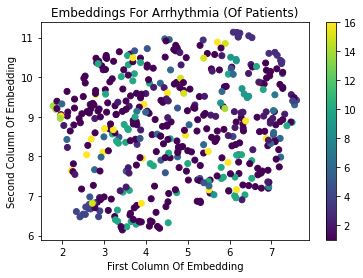

In [29]:
graphEmbeddings(arrhythmiaStandardX, 
                colorVar = yLabel, # y-variable
                title = "Embeddings For Arrhythmia (Of Patients)")

UMAP did a horrible job separating all the different types of arrthymias. All the different clusters appear to be smothered together.

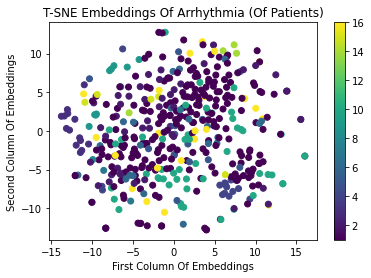

In [30]:
# embeddings with t-sne
graphEmbeddingsTSNE(arrhythmiaStandardX, 
                    title = "T-SNE Embeddings Of Arrhythmia (Of Patients)", colorVar = arrhythmia2["arrhythmiaType"], 
                    perplexity=40)

T-SNE also did a horrible job trying to separate all the different types of arrhythmias. Heck, T-SNE (and also UMAP) could not even separate healthy heart patients with arrhythmia patients well.

Given that the data could not be easily clustered or explained using PCA, UMAP, or T-SNE, it appears that there is little hope to actually deftly predict the 

### Try A Binary Label

Mayhaps if we made a binary y label (whether you have any type of arrhythmia or not), PCA could better explain the structure of the data, since we will have fewer labels.

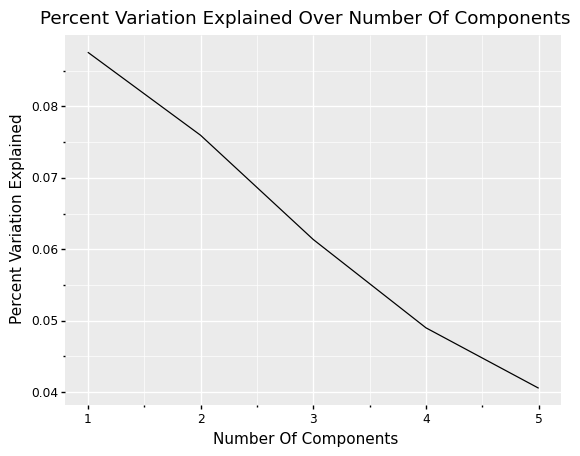

<ggplot: (170298228733)>


In [31]:
# binaryYLabel = 

binaryYLabel = 1 * (yLabel == 1.0)
X_train, X_test, y_train, y_test = train_test_split(arrhythmiaStandardX, binaryYLabel, test_size = 0.33, random_state = 420)

n_components = 5
whiten = False

train_index = range(0,len(X_train))
random_state = 420

# spawning the PCA model
pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

# fitting and transforming the df
train_pca = pca.fit_transform(X_train)
train_pca = pd.DataFrame(data = train_pca, index = train_index)

## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["perc_var"])
pc_df = pc_df.reset_index()
pc_df = pc_df.rename(columns={"index":"components"})

p = (
    pc_df >>
    ggplot(aes(x = "components", y = "perc_var")) +
    geom_line() +
    labs(
        x = "Number Of Components",
        y = "Percent Variation Explained",
        title = "Percent Variation Explained Over Number Of Components"
    ) +
    theme(axis_text= element_text(color = "black")) +
    theme(axis_title = element_text( color = "black")) +
    theme(axis_ticks = element_text( color = "black"))
#     theme(axis_title = element_text(size = 15))
)

# ggsave(plot = p, filename = "percentVariation")
print(p)



Never mind. PCA did not increase its percentage of variation explained.

But let us try some prediction, with xgboost.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(arrhythmiaStandardX, yLabel, 
                                                    test_size = 0.33, random_state = 420)

In [33]:
reg = LassoCV(cv=5, random_state= 420).fit(X_train, y_train)
reg.score(X_train, y_train)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5059595713523777, tolerance: 0.49022655601659754
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6113298049463083, tolerance: 0.49022655601659754
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.332976955513459, tolerance: 0.49022655601659754
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Ob

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.298353116925341, tolerance: 0.5210448132780084
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3382261622223268, tolerance: 0.5210448132780084
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7079145400231255, tolerance: 0.5210448132780084
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1658873983727744, tolerance: 0.4704301652892562
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.044945676326051, tolerance: 0.4704301652892562
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.042942882095531, tolerance: 0.4704301652892562
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8237394877592124, tolerance: 0.4068528925619835
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.004227181420731, tolerance: 0.4068528925619835
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.305814167790913, tolerance: 0.4068528925619835
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.691744217528594, tolerance: 0.4853619834710744
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.833600795442976, tolerance: 0.4853619834710744
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.67321608822789, tolerance: 0.4853619834710744
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

0.2675156785803744

In [34]:
filePath = "Data/cleveland.data"
# myDF = pd.read_csv(filePath, encoding = "utf-8", error = "ignore")
# myDF.head()
with open(filePath, 'rb') as f:
    contents = f.read()
contents

b'1 0 63 1 -9 -9 -9\n-9 1 145 1 233 -9 50 20\n1 -9 1 2 2 3 81 0\n0 0 0 0 1 10.5 6 13\n150 60 190 90 145 85 0 0\n2.3 3 -9 172 0 -9 -9 -9\n-9 -9 -9 6 -9 -9 -9 2\n16 81 0 1 1 1 -9 1\n-9 1 -9 1 1 1 1 1\n1 1 -9 -9 name\n2 0 67 1 -9 -9 -9\n-9 4 160 1 286 -9 40 40\n0 -9 1 2 3 5 81 0\n1 0 0 0 1 9.5 6 13\n108 64 160 90 160 90 1 0\n1.5 2 -9 185 3 -9 -9 -9\n-9 -9 -9 3 -9 -9 -9 2\n5 81 2 1 2 2 -9 2\n-9 1 -9 1 1 1 1 1\n1 1 -9 -9 name\n3 0 67 1 -9 -9 -9\n-9 4 120 1 229 -9 20 35\n0 -9 1 2 2 19 81 0\n1 0 0 0 1 8.5 6 10\n129 78 140 80 120 80 1 0\n2.6 2 -9 150 2 -9 -9 -9\n-9 -9 -9 7 -9 -9 -9 2\n20 81 1 1 1 1 -9 1\n-9 1 -9 2 2 1 1 1\n7 3 -9 -9 name\n4 0 37 1 -9 -9 -9\n-9 3 130 0 250 -9 0 0\n0 -9 1 0 2 13 81 0\n1 0 0 0 1 13 13 17\n187 84 195 68 130 78 0 0\n3.5 3 -9 167 0 -9 -9 -9\n-9 -9 -9 3 -9 -9 -9 2\n4 81 0 1 1 1 -9 1\n-9 1 -9 1 1 1 1 1\n1 1 -9 -9 name\n6 0 41 0 -9 -9 -9\n-9 2 130 1 204 -9 0 0\n0 -9 1 2 2 7 81 0\n0 0 0 0 1 7 -9 9\n172 71 160 74 130 86 0 0\n1.4 1 -9 40 0 -9 -9 -9\n-9 -9 -9 3 -9 -9 -9 2\

### LSVAT Voice Rehab

In [35]:
location = "Data/LSVT_voice_rehabilitation/LSVT_voice_rehabilitation.xlsx"
voice = pd.read_excel(location, sheet_name='Data')
yLabel = pd.read_excel(location, sheet_name='Binary response')
yLabel = yLabel - 1
demograph = pd.read_excel(location, sheet_name='Subject demographics')

In [36]:
# combining demographics, label, and voice signals into one df
df = pd.concat([voice, yLabel], axis=1)
print(f"df shape: {df.shape}")

df shape: (126, 311)


In [37]:
print(f"Voice shape: {voice.shape}")
print(f"Subject demos {demograph.shape}")

Voice shape: (126, 310)
Subject demos (126, 3)


In [38]:
voice.head()

,Jitter->F0_abs_dif,Jitter->F0_dif_percent,Jitter->F0_PQ5_classical_Schoentgen,Jitter->F0_PQ5_classical_Baken,Jitter->F0_PQ5_generalised_Schoentgen,Jitter->F0_abs0th_perturb,Jitter->F0_CV,Jitter->F0_TKEO_mean,Jitter->F0_TKEO_std,Jitter->F0_TKEO_prc5,...,det_TKEO_std4_1_coef,det_TKEO_std4_2_coef,det_TKEO_std4_3_coef,det_TKEO_std4_4_coef,det_TKEO_std4_5_coef,det_TKEO_std4_6_coef,det_TKEO_std4_7_coef,det_TKEO_std4_8_coef,det_TKEO_std4_9_coef,det_TKEO_std4_10_coef
0,0.088112,0.041697,0.000480,-3.723304e-06,0.000422,2.458381,6.332164e-07,47.021079,1366.430390,-7.103323,...,2.527583,7.088978,19.753255,54.335046,145.528630,375.097397,921.296579,2137.079844,4697.131077,9931.208257
1,0.161798,0.057364,0.000677,5.466365e-06,0.000206,2.592066,7.228518e-07,93.557936,2582.922776,-23.284761,...,2.841881,7.977363,22.203504,60.993338,163.560972,421.010306,1036.092589,2404.072562,5284.082128,11165.095662
2,0.554508,0.642913,0.007576,-7.443871e-07,0.006488,12.691326,6.946246e-04,52.988422,466.682635,-45.308680,...,1.806103,5.078616,14.135923,38.641654,103.466808,264.654626,649.657090,1507.384591,3315.804236,6974.600636
3,0.031089,0.027108,0.000314,-2.214722e-07,0.000216,0.754288,1.868647e-07,13.982754,417.217249,-1.207741,...,1.999637,5.610448,15.626164,42.943275,115.014975,296.320795,728.284936,1689.586636,3713.818933,7851.139360
4,0.076177,0.039071,0.000302,2.732106e-05,0.001102,1.270034,4.918186e-05,56.373996,1608.317410,-3.491990,...,2.453087,6.902199,19.117609,52.715873,141.113865,363.511021,893.246151,2071.625622,4554.204815,9623.566242


<AxesSubplot:>

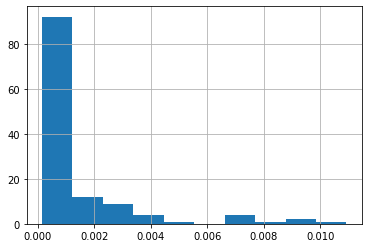

In [39]:
colName = "Jitter->F0_PQ5_classical_Schoentgen"
voice[colName].hist()

array([[<AxesSubplot:title={'center':'Binary class 1=acceptable, 2=unacceptable'}>]],
      dtype=object)

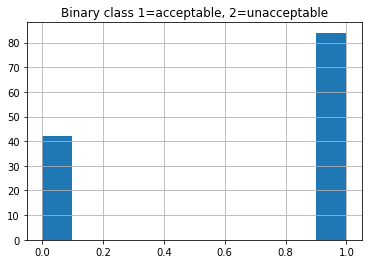

In [40]:
yLabel.hist()

There appears to be a slight imbalance. The ratio between 0 (acceptable) and 1 (unacceptable) is 1:2.

In [41]:
scaler = StandardScaler()
standardX = scaler.fit_transform(voice)

standardX = pd.DataFrame(standardX, columns = voice.columns)



<AxesSubplot:>

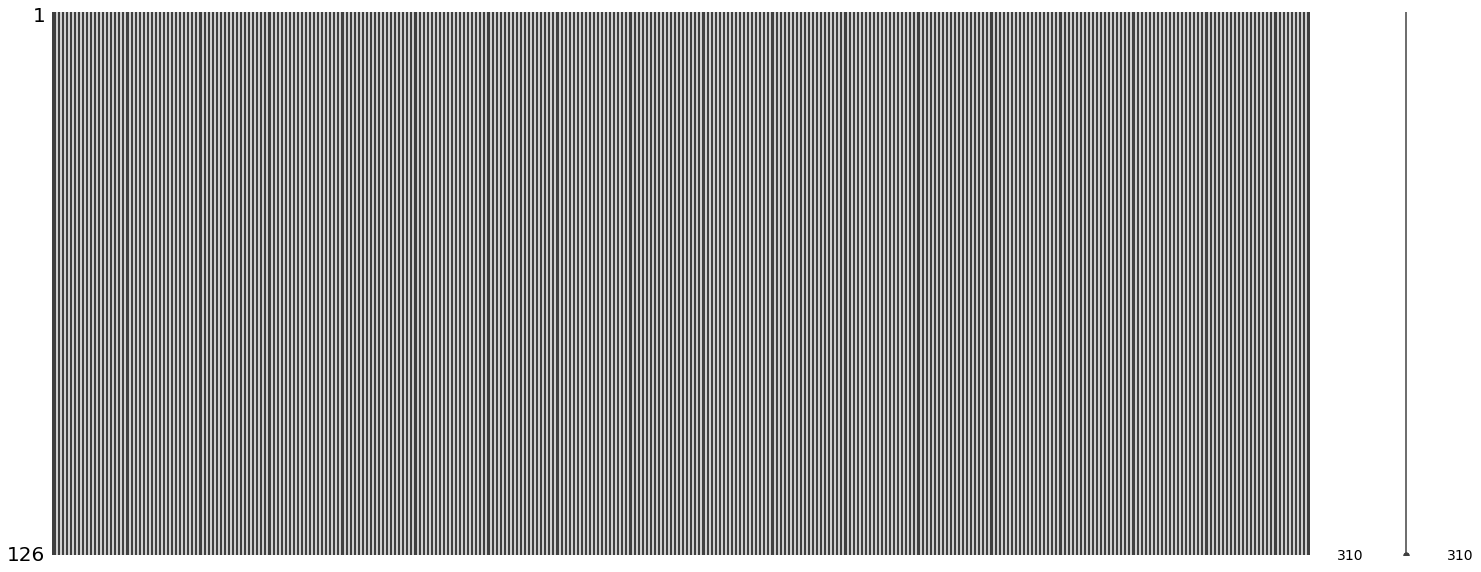

In [42]:
msn.matrix(standardX)

In [43]:
# finding the percentage of NAs in each column
sum(standardX.isna().sum()/standardX.shape[0] > 0)

0

None of the columns have any NAs. This is perfect!

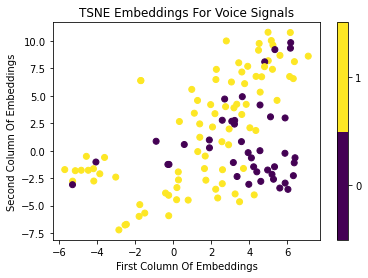

In [44]:
graphEmbeddingsTSNE(standardX, title = "TSNE Embeddings For Voice Signals", colorVar = yLabel.values, discrete_y = 2)

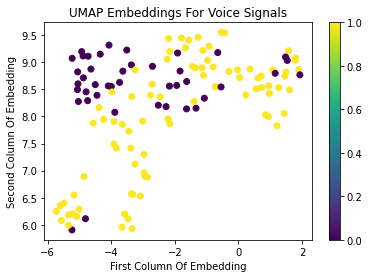

In [45]:
graphEmbeddings(standardX, colorVar = yLabel.values, title = "UMAP Embeddings For Voice Signals")

UMAP somewhat clustered the two different groups. Unfortunately, there is still some overlap between the yellow and purple points. It's hard for UMAP to explain the clusters. Neither UMAP nor tSNE clustered the voice signal data very well.

Now onto PCA! We would like to do dimension reduction.

## PCA

In [46]:
myIndex = range(0,len(standardX))
random_state = 420
white = False
n_components = 10

# spawning the PCA model
pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

# fitting and transforming the df
X_pca = pca.fit_transform(standardX)
X_pca = pd.DataFrame(data = X_pca, index = myIndex)

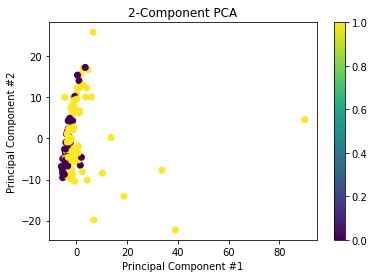

In [47]:
# Change column names, and then graph
X_pca.columns = [f"PC{i}" for i in range(1, X_pca.shape[1] + 1)]
colorVar = yLabel.values
graphPCAComponents(X_pca["PC1"], X_pca["PC2"], colorVar = colorVar)

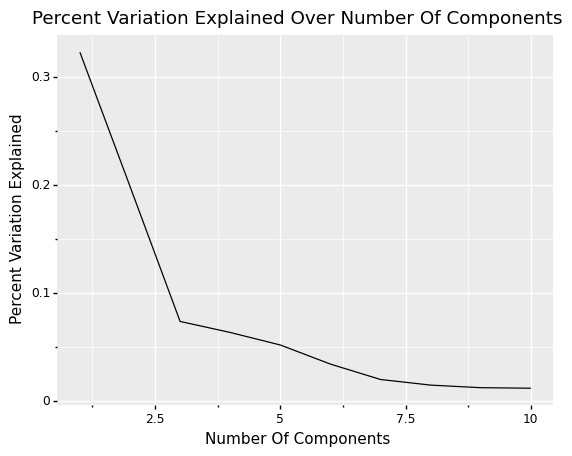

<ggplot: (170294560576)>


In [48]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(pca.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["perc_var"])
pc_df = pc_df.reset_index()
pc_df = pc_df.rename(columns={"index":"components"})

p = (
    pc_df >>
    ggplot(aes(x = "components", y = "perc_var")) +
    geom_line() +
    labs(
        x = "Number Of Components",
        y = "Percent Variation Explained",
        title = "Percent Variation Explained Over Number Of Components"
    ) +
    theme(axis_text= element_text(color = "black")) +
    theme(axis_title = element_text( color = "black")) +
    theme(axis_ticks = element_text( color = "black"))
#     theme(axis_title = element_text(size = 15))
)

# ggsave(plot = p, filename = "percentVariation")
print(p)

In [49]:
(
    pc_df >>
    mask(X.components <= 3) >>
    summarize(sumVariance = X.perc_var.sum())
)

,sumVariance
0,0.595212


It appears that the ideal number of principal components is 3. With 3 principal components, we explained about 59.52%, almost 60% of the data. That is pretty swell.

In [50]:
# Loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ["PC" + str(i + 1) for i in range(pca.components_.T.shape[1])],
                        index = standardX.columns # row names-ish
                       )

tinyLoadings = (
    # Grabbing only 2 components
    loadings.iloc[:, 0:3] >> 
    mask(
        (abs(X.PC1) > 0.1) |
        (abs(X.PC2) > 0.1) |
        (abs(X.PC3) > 0.1)
    )
)
tinyLoadings.style.background_gradient(cmap
                                       =
#                                        'seismic'
                                       "coolwarm"
                                      )

,PC1,PC2,PC3
Jitter->F0_TKEO_prc25,-0.017005,-0.013964,-0.101497
Shimmer->Ampl_dif_percent,0.019493,-0.038738,0.111294
Shimmer->Ampl_PQ3_classical_Schoentgen,0.019482,-0.038657,0.111348
Shimmer->Ampl_PQ3_generalised_Schoentgen,0.024555,-0.023952,0.140052
Shimmer->Ampl_PQ5_classical_Schoentgen,0.024204,-0.029392,0.123502
Shimmer->Ampl_PQ5_generalised_Schoentgen,0.024555,-0.023952,0.140052
Shimmer->Ampl_PQ11_classical_Schoentgen,0.023252,-0.030302,0.128350
Shimmer->Ampl_PQ11_generalised_Schoentgen,0.024555,-0.023952,0.140052
Shimmer->Ampl_dB,0.021141,-0.039699,0.112221
Shimmer->Ampl_CV,0.023320,-0.031897,0.132796


It appears that the first principal component does not have very strong loadings (loadings > 0.1).

In [51]:
X_train, X_test, y_train, y_test = train_test_split(standardX, yLabel, 
                                                    test_size = 0.33, random_state = 420)


reg = LassoCV(cv=5, tol = 0.01, random_state= 420, max_iter = 500).fit(X_train, y_train)
reg.score(X_train, y_train)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.4968478012338643

We got barely 50% on the model score. We performed no better than a coin flip.

In [53]:
# yPred

In [54]:
# the predicted values

In [55]:
yPred = reg.predict(X_test)
yPred = 1 * (yPred > 0.5)
confusion_matrix(y_test, yPred, labels = [0, 1])

array([[ 7, 10],
       [ 0, 25]], dtype=int64)

For Lasso CV, we got 7 true positives, 25 true negatives, and 10 false positives, and 0 false negatives. This model appears to be hyperactive in labeling a patient as positive, or having "unacceptable" quality of speech.

In [56]:
logReg = LogisticRegression(penalty = "l1", random_state= 420, solver = "saga", max_iter = 7000).fit(X_train, y_train)

yPred = logReg.predict(X_test)
confusion_matrix(y_test, yPred, labels=[0, 1])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([[11,  6],
       [ 3, 22]], dtype=int64)

It appears that we have 11 true positives and 22 true negatives. 6 false positives and 3 false negatives. Out of a test size of 42 patients, we have only 9 mislabelled people.

In [57]:
def getAUC(y_test, yPred, pos_label = 1):
    '''
    Gets the AUC score and the false positive true positive rates dataframe.
    
    @param array y_test the given y labels
    @param array yPred the predicted y labels
    @pos_label int default 1. This is the value we appoint for a positive case.
    @return the area under the curve. We want it to be as close to 1 as possible
    '''

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, yPred, pos_label=1)

    # SPAWN DATAframe
    # columns: fpr, tpr
    rates = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))

    # Computes Auc. Need false pos rates and true ppos rates
    roc_auc = auc(rates['fpr'], rates['tpr'])
    print('AUC: ', roc_auc)
    return roc_auc, rates

yPredProba = logReg.predict_proba(X_test)
aucScore, rates = getAUC(y_test, yPredProba[:, 1])
print(aucScore)

AUC:  0.9105882352941176
0.9105882352941176


AUC:  0.9105882352941176
0.9105882352941176


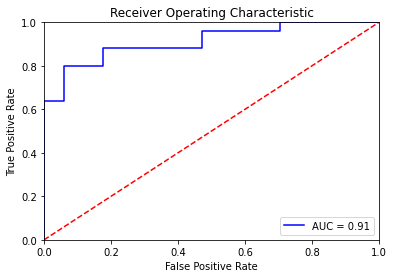

In [59]:
# Curve represented by ratio of false pos and true pos rates
def graphROC(y_test, yPred, pos_label = 1):
    '''
    Graphs the ROC curve based on the rates
    '''
    
    aucScore, rates = getAUC(y_test, yPred, pos_label = 1)
    print(aucScore)
    fig3 = plt.figure()
    plt.plot(rates.fpr, rates.tpr, 'b', label = 'AUC = %0.2f' % aucScore)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
    fig3.savefig('roc_curve.png')
graphROC(y_test, yPredProba[:, 1])

Our logistic regression model performed worse than a coin flip. As our false positive rate increase, our true positive rate did not increase as much. That means we made more false positives than true positives.

In [75]:
def eta_lda(a, eta):
    '''
    Soft threshold function
    :param a: parameter to threshold
    :param eta: soft threshold parameter, 𝜂 is chosen to manage the tradeoff between Type I and Type II errors.
    :return: soft thresholded value
    '''
    if a > eta:
        return 1
    else:
        return 0
    
def lda(y, X, eta):
    '''
    Linear Discriminant Analysis function
    :param y: true lable matrix of test dataset
    :param X: feature matrix of test dataset
    :param eta: soft threshold parameter, 𝜂 is chosen to manage the tradeoff between Type I and Type II errors
    :return: prediction of each data row
    '''
    X = np.array(X)
    n = len(X)
    pred = [] # save the class prediction
    predict_proba=[] # Estimate probability for each class
    scaler = StandardScaler() # initiate standard scaler
    for i in range(n):
        fx = (X[i] - mu_0) @ k_0 @ (X[i] - mu_0).T -np.log(np.linalg.det(k_0))\
        - (X[i] - mu_1) @ k_1 @ (X[i] - mu_1).T + np.log(np.linalg.det(k_1))
        pred.append(eta_lda(fx, eta)) # 1e-1 = 0.1, 1e2 = 100
        predict_proba.append(fx)
        
    accu_lda = sum(1 for x,y in zip(y,pred) if x == y) / len(y)
    proba_lda = np.array(predict_proba_lda).reshape(-1,1) # reshape list to array for standard scaling
    scaler.fit(proba_lda)
    proba_lda = scaler.transform(proba_lda) # transform F(x) to with standard scaler
    return pred, accu_lda, proba_lda
        
y_pred_lda, accu_lda, predict_proba_lda = lda(y_test, X_test, 100)
print(f'The accuracy rate is {accu_lda}.')
print(confusion_matrix(y_test, y_pred_lda))
# Orange stars on blue dots indicate successful prediction
plt.plot(y_test,'o') # blue circles
plt.plot(y_pred_lda,'*') # orange stars
plt.show()



NameError: name 'mu_0' is not defined

<AxesSubplot:>

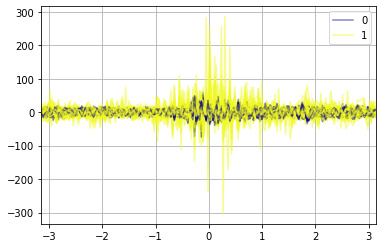

In [74]:
# also try using the pandas andrews curve function

fig = pd.plotting.andrews_curves(pd.concat([standardX, yLabel], axis = 1), 'Binary class 1=acceptable, 2=unacceptable', 
                           alpha = 0.5,colormap ='plasma')
fig

Each color represents a label. And each little spike represents a column.

Furthermore, we see that the gold and indigo colors are mixed. This implies poor clustering, unfortunately.

In [62]:
# K Means Clustering
kmeans = KMeans(n_clusters=2, random_state = 420).fit(X_train, y_train)
yPred = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_

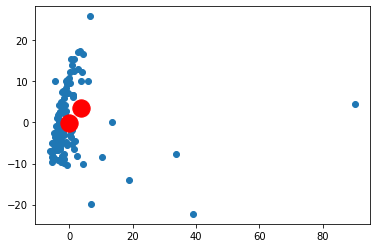

In [63]:
plt.scatter(X_pca["PC1"], X_pca["PC2"])
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.show()

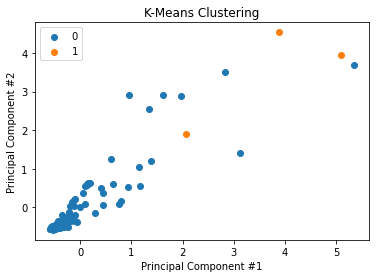

In [64]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(standardX)
 
#Getting unique labels
u_labels = np.unique(yLabel)
 
#plotting the results:
for i in u_labels:
    plt.scatter(standardX.iloc[label == i , 0] , standardX.iloc[label == i , 1] , label = i)
plt.legend()
plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.title("K-Means Clustering")
plt.show()
# our data is WACK

There appears to be only 3 blue patients. It appears that kMeans clustering did not cluster well at all. Furthermore, somehow, kMeans clustering found a bunch of unacceptable voice cases (so many orange points) and not enough acceptable voice cases (blue points). There appears to be a loto f false positives in this K Means clustering graph.

All in all, the main clustering methods (UMAP, tSNE, KMeans) did not cluster our data very well. This implies that our data is fundamentally not low-dimensional.

In [65]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

data_dmatrix = xgb.DMatrix(data=X_train, label= yLabel)

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed= 420)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.493998,0.003128,0.497472,0.001767
1,0.489030,0.005672,0.496740,0.003296
2,0.484276,0.008294,0.496146,0.004959
3,0.479833,0.010409,0.495547,0.005754
4,0.476003,0.012425,0.494909,0.006632


In [67]:
cv_results.shape

(10, 4)

In [68]:
myXGB = xgb.XGBClassifier(objective = "reg:logistic", colsample_bytree = 0.3, 
                          learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
myXGB.fit(X_train, y_train)
myXGBPred = myXGB.predict(X_test)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


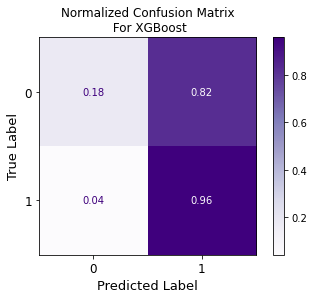

In [73]:
def plotConfusionMatrix(model, X_test, y_test, title = "Normalized Confusion Matrix\n For XGBoost"):
    

    fig = m.plot_confusion_matrix(model, X_test, y_test, normalize = "true", cmap = "Purples")
    fig.ax_.set_title(title)
    plt.xlabel(xlabel = "Predicted Label", fontsize = 13)
    plt.ylabel(ylabel = "True Label", fontsize = 13)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
#     plt.savefig("Confusion_Matrix_Indiv_xgboost.png", bbox_inches = "tight")
    plt.show()
plotConfusionMatrix(myXGB, X_test, y_test)